<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Projet Data Visualisation</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }
        h1 {
            text-align: center;
            font-size: 3rem;
            color: #2c3e50;
            margin-bottom: 10px;
        }
        h2 {
            text-align: center;
            font-size: 2rem;
            color: #2980b9;
        }
        p {
            text-align: center;
            font-size: 1.2rem;
            margin: 10px auto;
            line-height: 1.6;
            color: black;
        }
        .container {
            width: 80%;
            margin: 50px auto;
            padding: 20px;
            background-color: #ffffff;
            border: 1px solid #dcdcdc;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        .highlight {
            font-weight: bold;
            color: #e74c3c;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Projet Data Visualisation</h1>
        <h2>Cyril Kfouri, Mathias Robert, Maxime Maeder, Luc Renaud, Maxime Lambert</h2>
        <p><span class="highlight">Group 2 - Data and AI</span></p>
        <h2>Données Foncières</h2>
        <p><strong>Objectif:</strong> Solution pour un investisseur immobilier.</p>
    </div>
</body>
</html>


<h1 style="color: #e74c3c; text-align: left; margin-bottom: 50px;">1 - Nettoyage et préparation des données</h1>
<h2 style="text-align: center; margin-top: 20px; color: #3498db;">A - Découverte du DataFrame</h2>



In [1]:
import pandas as pd
from correlation_analyze import CorrelationAnalyzer

In [2]:
file_path = '../CSV/données_foncières_france_2024_avant_nettoyage.csv'
df = pd.read_csv(file_path, low_memory=False)

In [3]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212


**On se rend compte qu'on a affaire a un très grand , dataset , il faudra traiter ce dataframe en le divisant en plusieurs pettis dataframe a theme pour mieux comprendre les données pour pouvoir les traité**

In [4]:
df.shape

(1566643, 40)

In [5]:
print(df.columns)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')


<h2 style="text-align: center; color: #3498db;">B - Division en plusieurs data frame pour meuilleur manipulation et compréhension des données</h2>

In [6]:
def split_dataframe(df):

    df_mutation = df[['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation']]

    df_adresse = df[['adresse_numero', 'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',  'code_postal', 'code_commune', 'nom_commune', 'code_departement',
                      'ancien_code_commune', 'ancien_nom_commune']]
    
    df_parcelle_lot = df[['id_parcelle', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero',
                           'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'nombre_lots']]
    
    df_type_local = df[['code_type_local', 'type_local',  'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales', 'code_nature_culture', 
                        'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale']]
    
    df_coordonnees = df[['longitude', 'latitude']]

    df_financier = df[['valeur_fonciere']]

    return df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier

In [7]:
df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier = split_dataframe(df)

<h2 style="text-align: center; color: #3498db;">C - Traitement des Lignes (Suppréssion de lignes )</h2>

Il faut en tout premier verifier les lignes ou des informations importantes sont manquantes qui nous empecheraient de travailler correctment sur l'etude des pris

In [8]:
df_mutation.isna().sum()

id_mutation           0
date_mutation         0
numero_disposition    0
nature_mutation       0
dtype: int64

Apres une etude faite plus basse nous avons remarqué que le nom de comunne et le code departement sont les plus importants pour localiser une mutation donc les 2 ne possèdent pas de valeurs manquantes , on garde donc toutes les lignes

In [9]:
df_adresse.isna().sum()

adresse_numero          619870
adresse_suffixe        1499556
adresse_nom_voie          8232
adresse_code_voie         8201
code_postal               8485
code_commune                 0
nom_commune                  0
code_departement             0
ancien_code_commune    1566622
ancien_nom_commune     1566622
dtype: int64

On ne garde que la france metropolitaine

In [10]:
df['code_departement'] = pd.to_numeric(df['code_departement'], errors='coerce')
df = df[df['code_departement'].between(0, 95)]


Ici je vais supprimler toutes les lignes qui ne possèdent pas de coordonnées car les analyses ultérieure se feront avec des cartes, donc je ne pourrais pas afficher les mutations sans coordonées

In [11]:
df_coordonnees.isna().sum()

longitude    21242
latitude     21242
dtype: int64

In [12]:
df = df.dropna(subset=['longitude', 'latitude'], how='all')

Ici je vais supprimler toutes les lignes qui ne possèdent pas de données foncieres car le but est d'etudier les prix et si nous n'avons pas de données concernant les prix il est inutile de les garder

In [13]:
df_financier.isna().sum()

valeur_fonciere    17054
dtype: int64

In [14]:
df = df.dropna(subset=['valeur_fonciere'], how='all')

<h2 style="text-align: center; color: #3498db;">D - Traitement des Types de Colonnes</h2>

In [15]:
df_mutation['date_mutation'] = pd.to_datetime(df_mutation['date_mutation'], errors='coerce')
df_mutation['date_mutation'] = df_mutation['date_mutation'].apply(lambda x: x.replace(day=1) if pd.notnull(x) else x)

Ici j'ai drop du df directement pour réactulasier tous les data frame plus facilement avec la fonction créé précédement

In [16]:
df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier = split_dataframe(df)

<h2 style="text-align: center; color: #3498db;">E - Suppréssion de Colonnes</h2>

Pour cela, on urtilise les fonction crées dans une classe pour afficher les corélations entre les entre les différentes colomnes, lorsque la corélation entre 2 colomnes est de 1, ca veut dire que on a 2 colomnes qui nous apporte exactement les memes precisions et donc ce n'est pas utile de garder les 2 pour l'etude

<h1 style="margin-top: 20px;">1 - DF Mutation</h1>

In [17]:
df_mutation

,id_mutation,date_mutation,numero_disposition,nature_mutation
0,2024-1,2024-01-02,1,Vente
1,2024-2,2024-01-03,2,Vente
2,2024-3,2024-01-08,1,Vente
3,2024-4,2024-01-03,1,Vente
4,2024-4,2024-01-03,1,Vente
...,...,...,...,...
1566638,2024-556071,2024-04-09,1,Vente
1566639,2024-556071,2024-04-09,1,Vente
1566640,2024-556071,2024-04-09,1,Vente
1566641,2024-556072,2024-04-04,1,Adjudication


In [18]:
df_mutation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504616 entries, 0 to 1566642
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   id_mutation         1504616 non-null  object
 1   date_mutation       1504616 non-null  object
 2   numero_disposition  1504616 non-null  int64 
 3   nature_mutation     1504616 non-null  object
dtypes: int64(1), object(3)
memory usage: 57.4+ MB


Ici on remarque que toutes les colomnes vont etre essentilles puisque chacune nous apporte une information unique


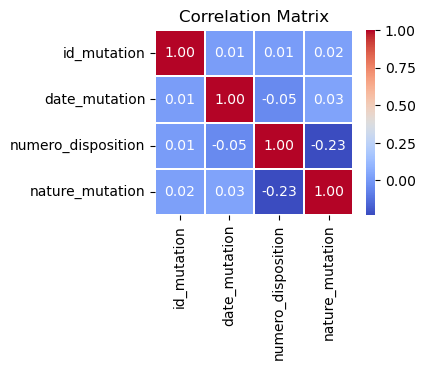

In [19]:
analyzer_mutation = CorrelationAnalyzer(df_mutation)
analyzer_mutation.plot_correlation_matrix()

On remarque ici que ce df ne possede aucune NULL value , on ne drop donc rien

In [20]:
df_mutation.isna().sum()

id_mutation           0
date_mutation         0
numero_disposition    0
nature_mutation       0
dtype: int64

<h1 style="margin-top: 100px;">2 - DF Adresse</h1>

In [21]:
df_adresse

,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune
0,NaN,NaN,LE DELIVRE,B020,1230.0,01076,Chaley,1.0,NaN,NaN
1,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,01103,Chevry,1.0,NaN,NaN
2,NaN,NaN,PIN HAMEAU,B086,1290.0,01203,Laiz,1.0,NaN,NaN
3,29.0,NaN,PL DU JURA,0500,1170.0,01173,Gex,1.0,NaN,NaN
4,29.0,NaN,PL DU JURA,0500,1170.0,01173,Gex,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1566638,60.0,NaN,RUE BRANCION,1255,75015.0,75115,Paris 15e Arrondissement,75.0,NaN,NaN
1566639,60.0,NaN,RUE BRANCION,1255,75015.0,75115,Paris 15e Arrondissement,75.0,NaN,NaN
1566640,60.0,NaN,RUE BRANCION,1255,75015.0,75115,Paris 15e Arrondissement,75.0,NaN,NaN
1566641,5.0,NaN,RUE DE LA MAIN D OR,5920,75011.0,75111,Paris 11e Arrondissement,75.0,NaN,NaN


On remarque que ici il y'a des corrélation = 1 qui ne sont pas sur la diagonale, ca veut dire que nous avons des infromations qui nous apporte le meme niveau de precision, il faut en drop une des 2 corréllé

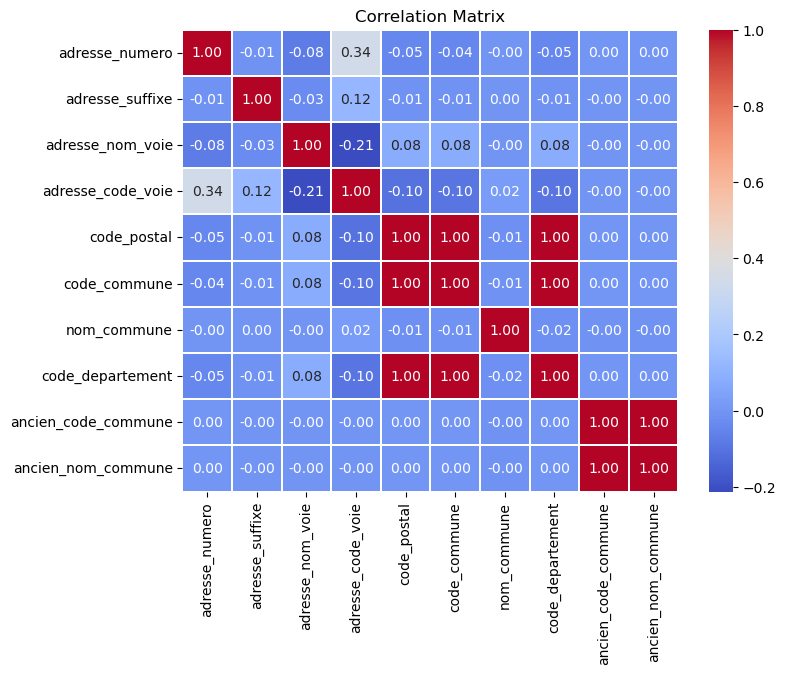

In [22]:
analyzer_adresse = CorrelationAnalyzer(df_adresse)
analyzer_adresse.plot_correlation_matrix()

In [23]:
analyzer_adresse.find_high_correlation_pairs()

Pairs of variables with correlation greater than 0.9:
code_commune and code_postal: 1.00
code_commune and code_departement: 1.00
ancien_code_commune and ancien_nom_commune: 1.00
code_departement and code_postal: 1.00


In [24]:
df_adresse.isna().sum()

adresse_numero          589594
adresse_suffixe        1440654
adresse_nom_voie          7463
adresse_code_voie         7432
code_postal               7704
code_commune                 0
nom_commune                  0
code_departement             0
ancien_code_commune    1504595
ancien_nom_commune     1504595
dtype: int64

Ici je descide donc de uniquement pas drop le code du département ainsi que le nom de la commune qui fournissent toutes les infos que pourraient fournir le code postal ou le code commune en ce qui concerne les corélations. Je drop aussi ancien_code_commune  et ancien_nom_commune qui ne possèdent que des valeures nulles ainsi que adresse_suffixe qui possède beaucoup de valeures nulles

In [25]:
df_adresse = df_adresse.drop(['code_postal', 'ancien_nom_commune', 'code_commune', 'adresse_code_voie', 'adresse_suffixe', 'ancien_code_commune'], axis=1)

<h1 style="margin-top: 100px;">3 - DF Parcelle Lot</h1>

In [26]:
df_parcelle_lot 

,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots
0,010760000B0514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,011030000B1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,012030000C1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,01173000AI0551,NaN,NaN,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,01173000AI0551,NaN,NaN,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566638,75115000AJ0019,NaN,NaN,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1566639,75115000AJ0019,NaN,NaN,531,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1566640,75115000AJ0019,NaN,NaN,531,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1566641,75111000CE0092,NaN,NaN,2,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Ici la plusieurs collomnes sont nuls , on pourrait etre tenté de les supprimer, c'est pour cela on verifie leur corélation avec le prix

In [27]:
df_parcelle_lot.isna().sum()

id_parcelle                  0
ancien_id_parcelle     1504616
numero_volume          1501222
lot1_numero            1050179
lot1_surface_carrez    1371944
lot2_numero            1358453
lot2_surface_carrez    1459883
lot3_numero            1479862
lot3_surface_carrez    1499723
lot4_numero            1496979
lot4_surface_carrez    1503513
lot5_numero            1501623
lot5_surface_carrez    1504301
nombre_lots                  0
dtype: int64

On remarque que sur toutes les colomnes du data frame ce sont celles la qui ont la plujs grande influance sur le prix , on ne peut donc pas du tout supprimer ces colomnes

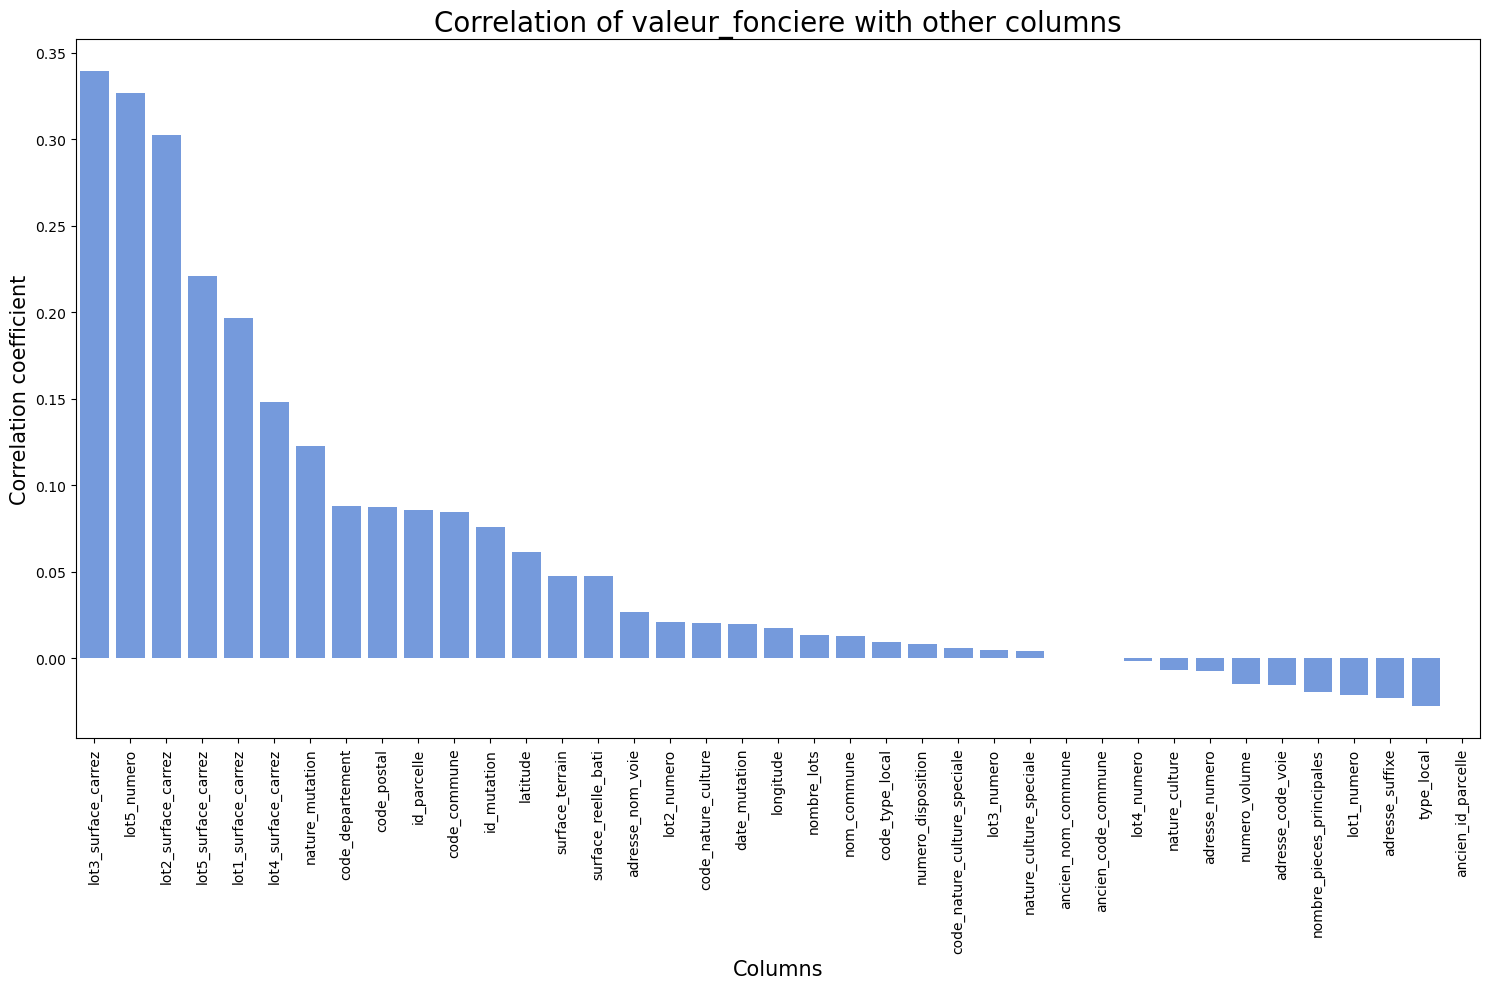

In [28]:
analyzer_df = CorrelationAnalyzer(df)
analyzer_df.plot_correlation_with_column('valeur_fonciere')

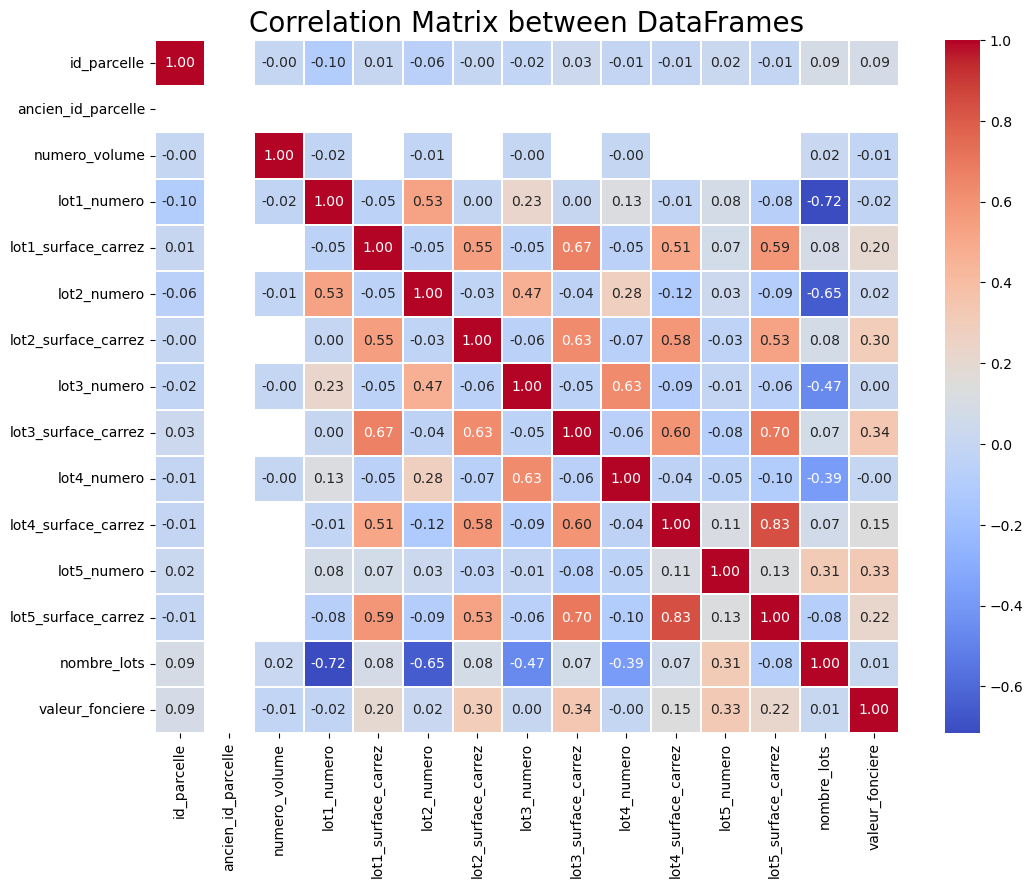

In [29]:
analyzer_parcelle_lot = CorrelationAnalyzer(df_parcelle_lot)
analyzer_parcelle_lot .plot_correlation_between_dfs(df_financier)

Ici on remarque que numero volume est pas utile au vu du manque d'information et sa non corélation au prix, on peut  donc le drop

Je drop aussi le nombre de lots comme il est completement correlé a l'ensemble des numéros de lots et n'est pas directmeent corélé au prix par rpport aux autres, il n'apporte donc aucune information pertinante

In [30]:
df_parcelle_lot = df_parcelle_lot.drop(['id_parcelle','ancien_id_parcelle', 'numero_volume', 'nombre_lots'], axis=1)

In [31]:
df_parcelle_lot

,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1566638,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566639,531,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566640,531,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566641,2,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1 style="margin-top: 100px;">4 - DF Type Local</h1>

In [32]:
df_type_local

,code_type_local,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale
0,NaN,NaN,NaN,99.0,NaN,P,prés,NaN,NaN
1,NaN,NaN,NaN,115.0,NaN,S,sols,NaN,NaN
2,NaN,NaN,NaN,497.0,NaN,S,sols,NaN,NaN
3,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1566638,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1566639,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1566640,2.0,Appartement,100.0,NaN,4.0,NaN,NaN,NaN,NaN
1566641,2.0,Appartement,60.0,NaN,2.0,NaN,NaN,NaN,NaN


In [33]:
df_type_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504616 entries, 0 to 1566642
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   code_type_local               851944 non-null   float64
 1   type_local                    851944 non-null   object 
 2   surface_reelle_bati           466188 non-null   float64
 3   surface_terrain               1045156 non-null  float64
 4   nombre_pieces_principales     851049 non-null   float64
 5   code_nature_culture           1045178 non-null  object 
 6   nature_culture                1045178 non-null  object 
 7   code_nature_culture_speciale  68622 non-null    object 
 8   nature_culture_speciale       68622 non-null    object 
dtypes: float64(4), object(5)
memory usage: 114.8+ MB


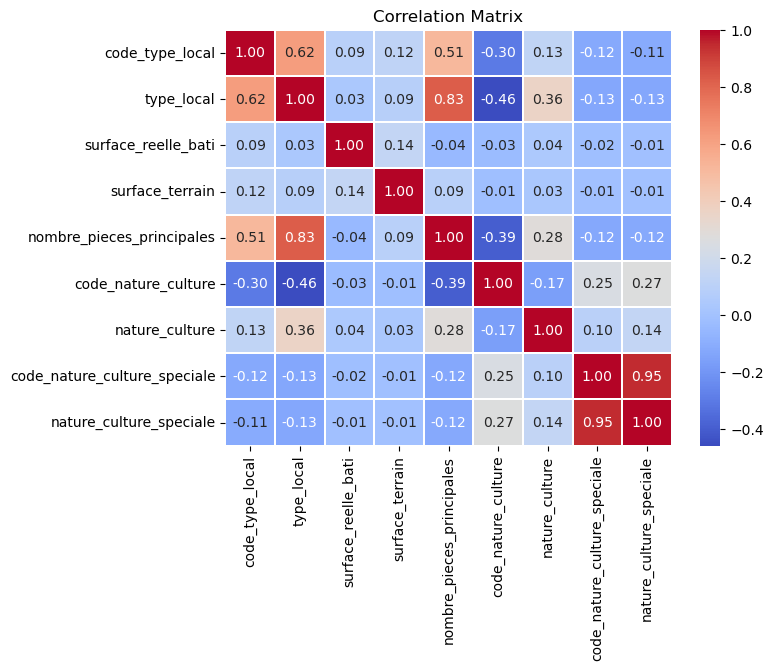

In [34]:
analyzer_type_local = CorrelationAnalyzer(df_type_local)
analyzer_type_local.plot_correlation_matrix()

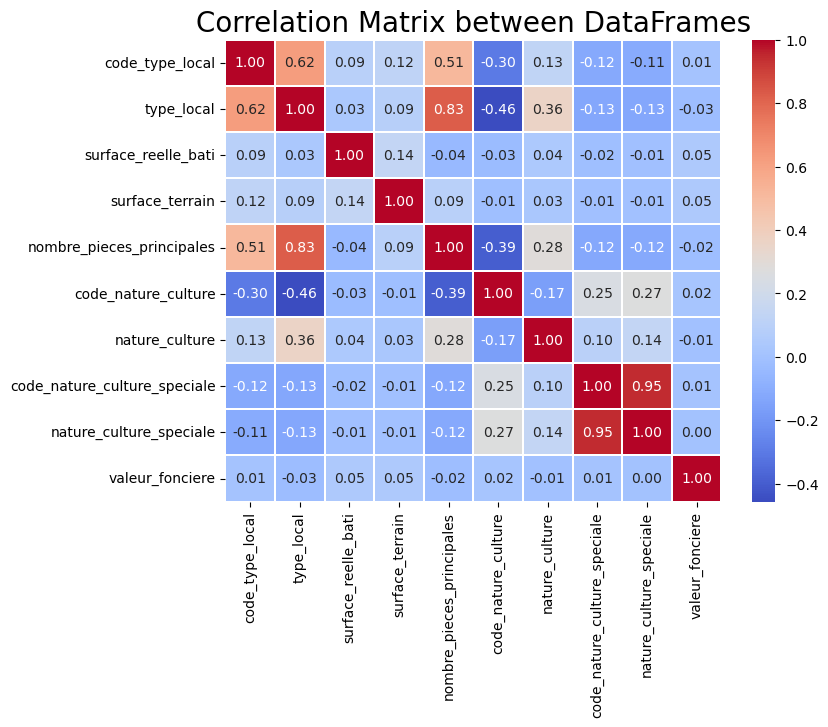

In [35]:
analyzer_type_local.plot_correlation_between_dfs(df_financier)

In [36]:
df_type_local = df_type_local.drop(['code_nature_culture_speciale', 'code_type_local', 'code_nature_culture'], axis=1)

<h2 style="text-align: center; color: #3498db;">F - Traitement des Valeurs NULL </h2>

<h2 style="text-align: center; color: #3498db;">E - Création du DataFrame et Export du CSV</h2>

Now we will concacatenate our dataset to have a better view of what is kbnow the final complete dataset we will be working with

In [37]:
new_df = pd.concat([df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier], axis=1, ignore_index=False)


In [38]:
new_df.to_csv('../CSV/données_foncières_france_2024.csv', index=False)